<a href="https://colab.research.google.com/github/jarminett/DCP/blob/main/Practica01/Practica01_0710082.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD GALILEO** \\
Instituto de Investigación de Operaciones \\
Posgrado en Análisis y Predicción de Datos \\
Luis Florian, 0710082, sección U \\

**Practica 1**



Los objetivos de esta práctica son los siguientes:

Utilizar estos datos de edad y estatura para implementar :

*   Hard-clustering con k-means (no usar sklearn)
*   Soft-clustering con GMM usando sklearn        
        

Ejecutar al menos 5 experimentos para seleccionar el valor de “K”

*   Ambos métodos pueden usar el mismo valor de “K”
*   Analizar el centroide de cada cluster y determinar si es posible asignar una categoría cada cluster

Analizar y concluir si el método del codo es adecuado para este problema

Usar los datos de prueba y estimar:

*   El cluster que k-means asigna cada uno.
*   La probabilidad de pertenecer a cada cluster según GMM        
        

Usar GMM y simular 1000 observaciones para estimar(estimación de Monte Carlo) el valor esperado(promedio) de la función f :

*   f(edad, estatura) = estatura /edad


### **Importing libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from scipy.spatial import distance


### **Loading Data**

In [5]:
df = pd.read_csv("/content/normales.csv", names=["Estatura","Edad"], header=0)
df.head(10)

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21


### **Data Visualization**

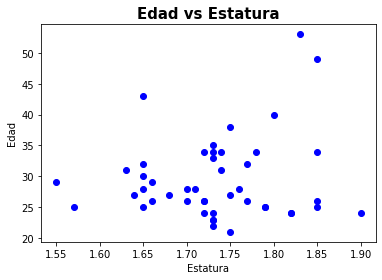

In [6]:
font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }
plt.scatter(df["Estatura"],df["Edad"],c="blue")
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("Edad vs Estatura",fontdict=font)
plt.show()

In [7]:
df.describe()

,Estatura,Edad
count,46.000000,46.000000
mean,1.732609,29.521739
std,0.075349,6.708996
min,1.550000,21.000000
25%,1.685000,25.000000
50%,1.730000,27.500000
75%,1.777500,32.750000
max,1.900000,53.000000


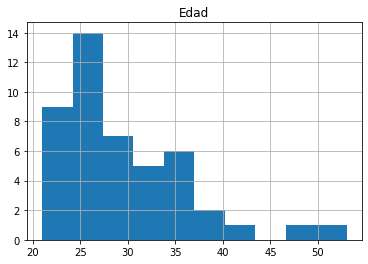

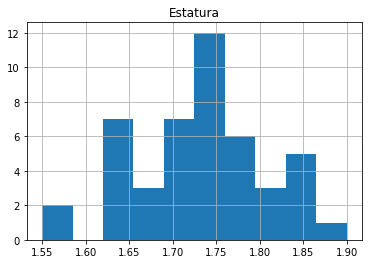

In [8]:
df.drop(['Estatura'],1).hist()
plt.show()
	
df.drop(['Edad'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


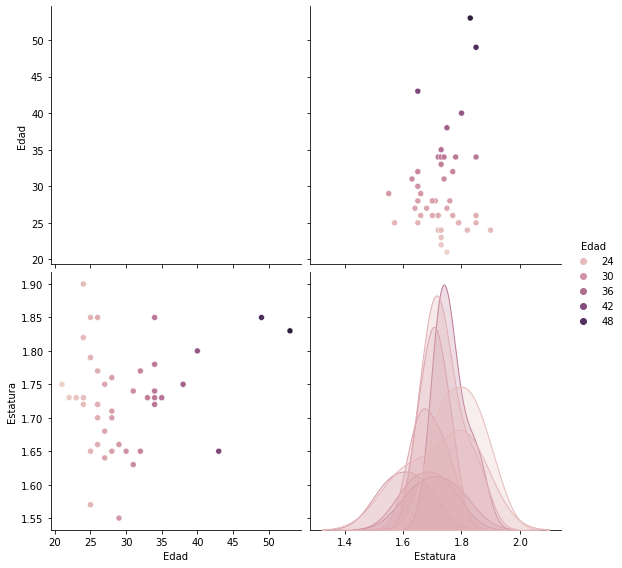

In [9]:
sb.pairplot(df.dropna(), hue='Edad',size=4,vars=["Edad","Estatura"],kind='scatter')

Se observa que es posible establecer identificar la data por grupos.  Los colores permiten hacerse una idea de como el clustering puede ser aplicado.

### **K-means algorithm**
K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos. \\
*Nota importante:* \\
El algoritmo converge a un resultado que puede ser el óptimo local, por lo que será conveniente volver a ejecutar más de una vez con puntos iniciales aleatorios para confirmar si hay una salida mejor. 

In [13]:
class KMeans:
    def __init__(self,dataset,k,verbose=True):
        self.dataset = dataset
        self.k = k
        self.centroids = self.__getCentroids()
        self.clusters = np.zeros((dataset.shape[0],1))
        self.cost = 0
        self.verbose = verbose
        
    def __getCentroids(self):
        centroids = None
        for i in range(self.dataset.shape[1]):
            column = np.random.uniform(np.min(self.dataset[:,i]), np.max(self.dataset[:,i]), self.k).reshape(-1,1)
            centroids = column if centroids is None else np.hstack((centroids,column))
        return centroids
    
    def __euclideanDistance(self, dataset, centroid):
        distance = np.sqrt(np.sum(np.subtract(dataset,centroid)**2,axis=1)).reshape(-1,1)
        return distance
            
    def __getDistances(self, dataset):
        distances = None
        for i in range(self.k):
            distance = self.__euclideanDistance(dataset,self.centroids[i])
            distances = distance if distances is None else np.hstack((distances,distance))
        return distances
    
    def __updateCentroids(self):
        for i in range(self.k):
            indices = np.where(self.clusters == i)
            if (indices[0].size):
                self.centroids[i] = np.mean(self.dataset[indices],axis=0)
    
    def fit(self):
        previous_centroids = np.zeros_like(self.centroids)
        while not np.array_equal(self.centroids,previous_centroids):
            distances = self.__getDistances(self.dataset)
            self.clusters = np.argmin(distances,axis=1)
            self.cost = np.mean(np.min(distances,axis=1))
            previous_centroids = self.centroids.copy()
            if self.verbose:
                print("Costo: "+str(self.cost))
                print("Actualizando centroides:")
                print(self.centroids)
                print()
            self.__updateCentroids()
            
    def predict(self, dataset):
        distances = self.__getDistances(dataset)
        clusters = np.argmin(distances,axis=1)
        return clusters

### **Training**

In [15]:
training = df[["Estatura","Edad"]].to_numpy(dtype="float64")

kmeans = KMeans(training,3)
kmeans.fit()
clusters = kmeans.predict(training)


Costo: 7.836279167597003
Actualizando centroides:
[[ 1.58856713 47.94369842]
 [ 1.77842024 39.06892441]
 [ 1.8740903  36.17792896]]

Costo: 3.0181332754314014
Actualizando centroides:
[[ 1.84       51.        ]
 [ 1.73333333 40.33333333]
 [ 1.72731707 27.68292683]]

Costo: 2.8165995736845626
Actualizando centroides:
[[ 1.84    51.     ]
 [ 1.7325  39.     ]
 [ 1.72725 27.5    ]]

Costo: 2.3038931848111672
Actualizando centroides:
[[ 1.84       51.        ]
 [ 1.75       36.22222222]
 [ 1.722      26.57142857]]

Costo: 2.0553359981879535
Actualizando centroides:
[[ 1.84       51.        ]
 [ 1.74166667 35.25      ]
 [ 1.7225     26.03125   ]]

Costo: 1.9612701502311338
Actualizando centroides:
[[ 1.84       51.        ]
 [ 1.73357143 34.64285714]
 [ 1.725      25.7       ]]

Costo: 1.8316915634050326
Actualizando centroides:
[[ 1.77666667 48.33333333]
 [ 1.74       34.        ]
 [ 1.725      25.7       ]]

Costo: 1.8439771266103477
Actualizando centroides:
[[ 1.77666667 48.33333333]
 [ 

### **Plotting results**
Se presentan en asteriscos rojos los centroides.

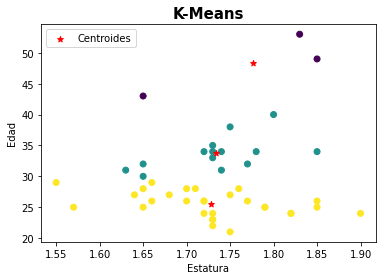

In [16]:
plt.scatter(df["Estatura"],df["Edad"],c=clusters)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], marker='*', c='red', label="Centroides")
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("K-Means", fontdict=font)
plt.legend()
plt.show()

### **Gaussian Mixture Model**

In [17]:
gmm = GaussianMixture(3)
gmm.fit(training)
gmm.predict(training)
clusters_gmm = gmm.predict(training)

### **Plotting Results**

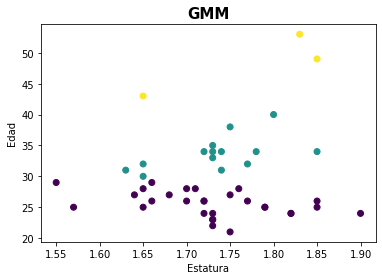

In [18]:
plt.scatter(df["Estatura"],df["Edad"],c=clusters_gmm)
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("GMM", fontdict=font)
plt.show()

### **Encontrar K**

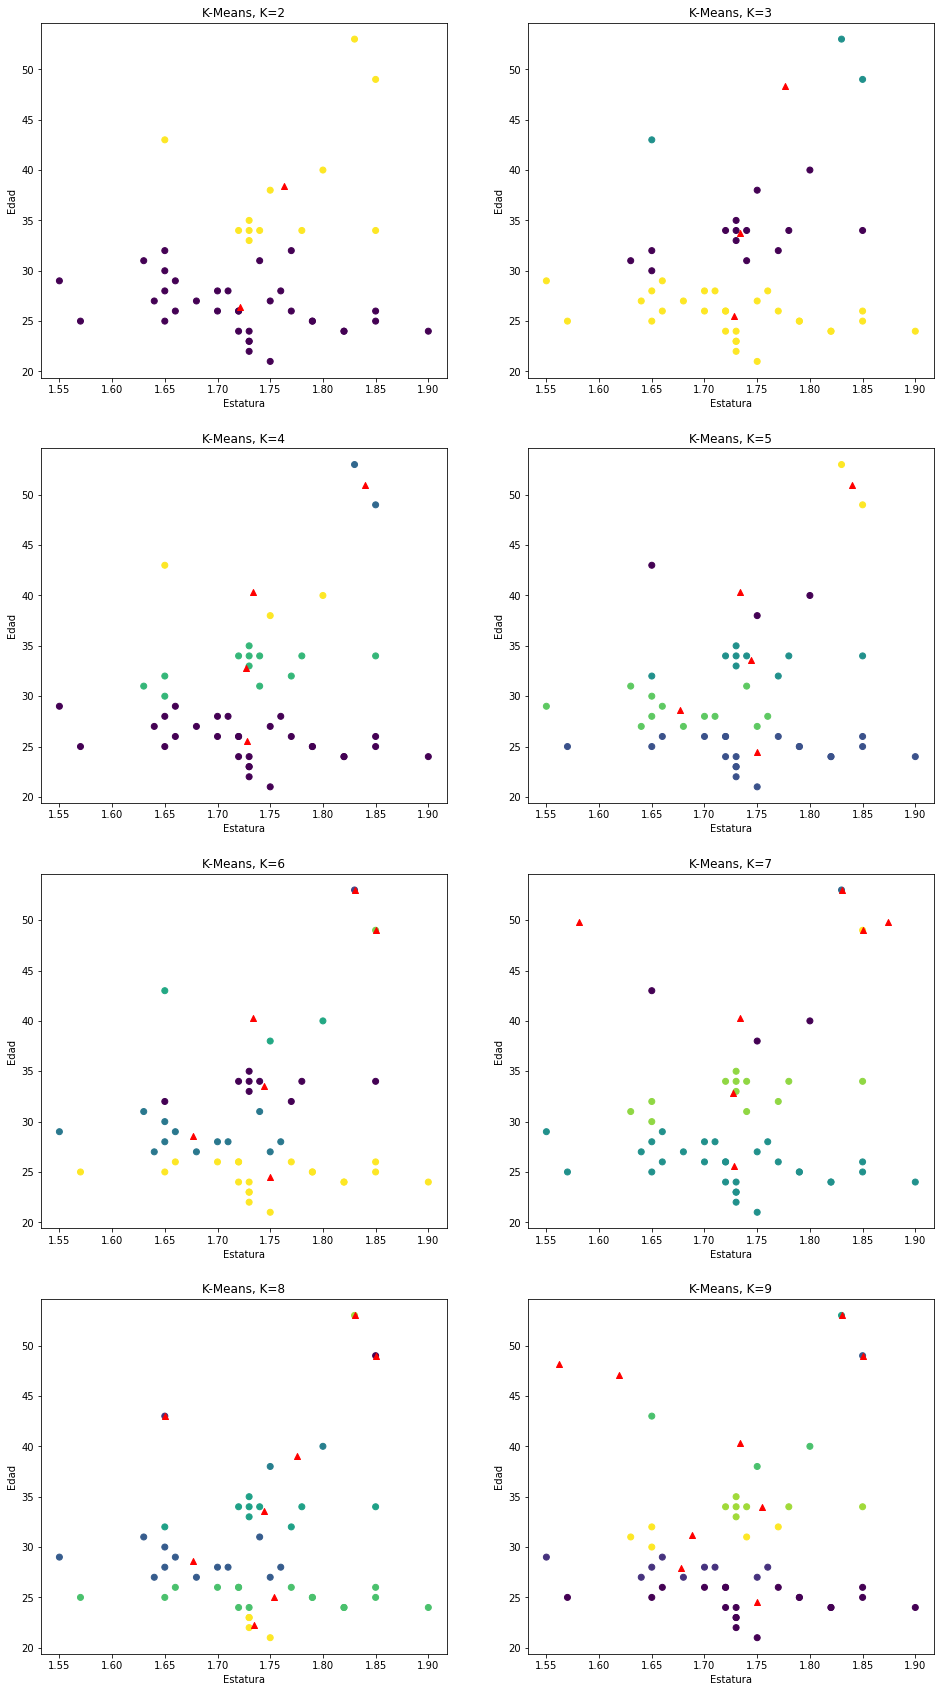

In [25]:
kmeans_costs = list()
f,axes = plt.subplots(5,2,sharex=False, figsize=(16,30))
plot_number = 0
for k in range(2,10):
    kmeans = KMeans(training,k,False)
    kmeans.fit()
    clusters = kmeans.predict(training)
    kmeans_costs.append(kmeans.cost)
    
    plot_number += 1
    plt.subplot(4,2, plot_number)
    plt.scatter(df["Estatura"],df["Edad"],c=clusters)
    plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], marker='^', c='red', label="Centroides")
    plt.xlabel("Estatura")
    plt.ylabel("Edad")
    plt.title("K-Means, K="+str(k))
            
plt.show()

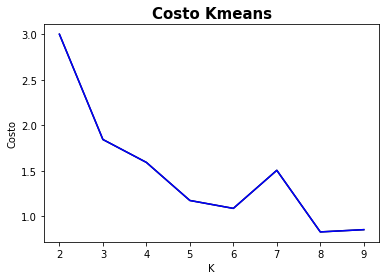

In [26]:


plt.plot(range(2,10), kmeans_costs, 'k' , range(2,10), kmeans_costs,'blue' )
plt.xlabel("K")
plt.ylabel("Costo")
plt.title("Costo Kmeans", fontdict=font)
plt.show()



La grafica de costo nos indica que el mejor valor de k es 8.  Luego se mantiene en el mismo costo mínimo.

## **Observaciones con GMM y Estimación de Monte Carlo**

In [28]:
data = gmm.sample(1000)[0]
print(data[1:20])  #Array con las probabilidades del cluster al que pertenece la observación.

[[ 1.76224228 24.21691674]
 [ 1.83700787 22.20509136]
 [ 1.60640521 26.13489207]
 [ 1.87213025 22.70063144]
 [ 1.73777564 28.22761657]
 [ 1.82436395 27.55069583]
 [ 1.66274003 25.3330747 ]
 [ 1.71210032 24.59168658]
 [ 1.69278445 28.11604212]
 [ 1.72816417 23.74241632]
 [ 1.86880813 27.32957743]
 [ 1.78083783 24.98610745]
 [ 1.60366562 29.80651824]
 [ 1.73643174 24.74006846]
 [ 1.65746327 20.60800841]
 [ 1.8204172  25.57921716]
 [ 1.77235739 21.34980253]
 [ 1.76788449 25.38130118]
 [ 1.70322616 26.88069168]]


In [29]:
clusterData = gmm.predict(data)
generatedDataProbabilities = gmm.predict_proba(data)
probabilities_list = list()

for i in range(len(clusterData)):
    probabilities_list.append(generatedDataProbabilities[0][clusterData[i]])

probabilities = np.array(probabilities_list)

## **Promedio del valor esperado**

In [32]:
#f(Estaura,Edad)= Estatura/Edad
mean = np.mean((data[:,0]/data[:,1])*probabilities)
print("Valor Esperado Promedio de Estatura/Edad: "+str(mean))

Valor Esperado Promedio de Estatura/Edad: 0.04445184954352761


### **Conclusiones**

*   Si se utiliza un K muy grande durante el entrenamiento de K-means, algunas categorías podrían quedar sin datos.  
*   K-Means y GMM son útiles en aprendizaje no supervisado para asignar una categoría a los datos.  Son bastante eficiente y el concepto inicial para entenderlos es el centroide.
*   Se pueden generar observaciones aleatorias dentro de la distribución de probabilidad del dataset de entrenamiento.